##Khai báo thư viện

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn import tree
import joblib
from sklearn.linear_model import LinearRegression
#Sử dụng thư viện dùng để sử dụng thuật toán Decision Tree
from sklearn.tree import DecisionTreeClassifier



##Liên kết Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Đọc dữ liệu

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/stroke_data.csv')

##Mô tả dữ liệu

In [ ]:
df.shape

(40910, 11)

In [ ]:
df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [ ]:
df.dtypes

sex                  float64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [ ]:
df.info

<bound method DataFrame.info of        sex   age  hypertension  heart_disease  ever_married  work_type  \
0      1.0  63.0             0              1             1          4   
1      1.0  42.0             0              1             1          4   
2      0.0  61.0             0              0             1          4   
3      1.0  41.0             1              0             1          3   
4      1.0  85.0             0              0             1          4   
...    ...   ...           ...            ...           ...        ...   
40905  1.0  38.0             0              0             0          4   
40906  0.0  53.0             0              0             1          4   
40907  1.0  32.0             0              0             1          2   
40908  1.0  42.0             0              0             1          3   
40909  1.0  35.0             0              0             0          4   

       Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0     

In [ ]:
#Thống kê định lượng các thuộc tính
df.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [ ]:
#Kiểm tra dữ liệu
df.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#Xuất ra các dữ liệu NaN trong cột giới tính
df.loc[df.isna()['sex']]

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
22478,NaN,39.0,0,0,1,4,1,70.56,28.6,1,0
28908,NaN,36.0,0,0,1,4,1,70.56,28.6,1,0
35184,NaN,77.0,0,0,1,4,1,70.56,28.6,1,0


In [ ]:
#Tìm dữ liệu sẽ thay thế chỗ bị thiếu
a = df['sex'].mean()
print(a)
df['sex'].fillna(a,inplace = True)

0.5551617082650891


In [ ]:
#Kiểm tra lại dữ liệu
df['sex'].isnull().sum()

0

##Vẽ biểu đồ

<Axes: title={'center': 'Count of stroke_label'}, xlabel='stroke', ylabel='count'>

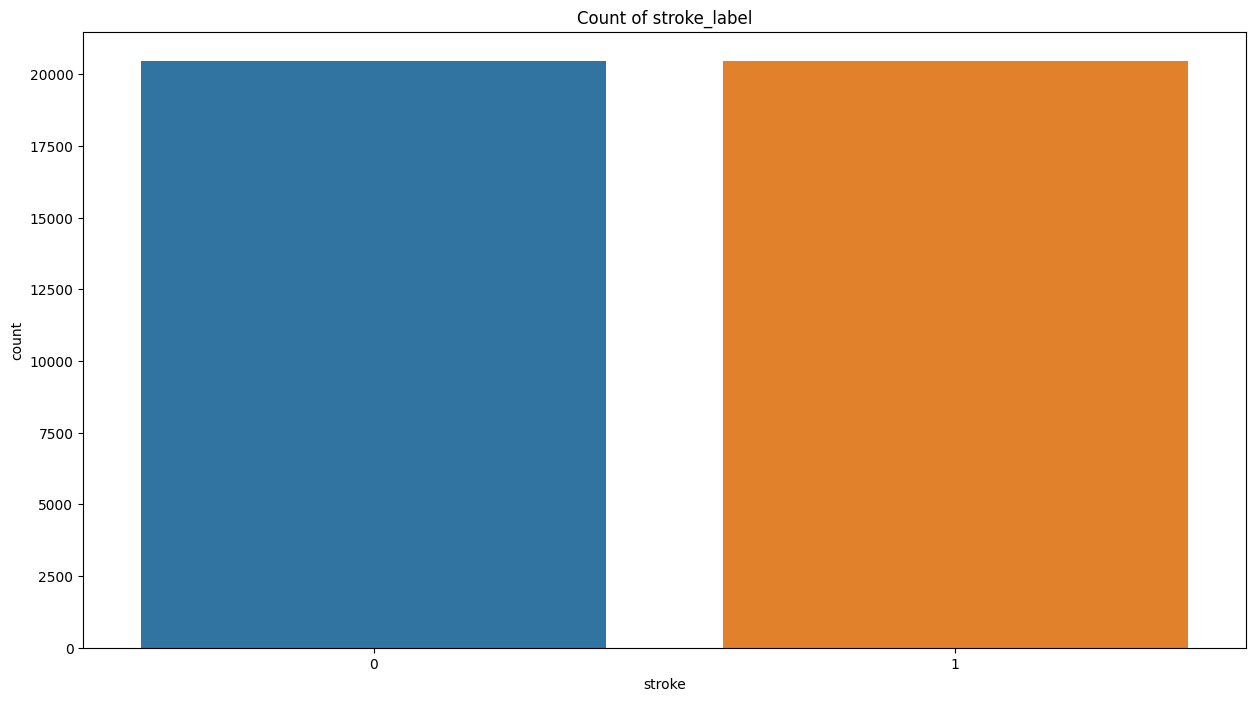

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of stroke_label')
sns.countplot(data=df, x='stroke')

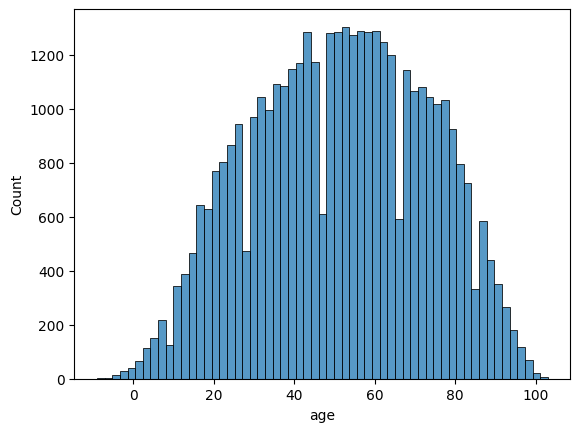

In [ ]:
#Phân bố người mắc bệnh theo độ tuổi
sns.histplot(df['age'])
plt.show()

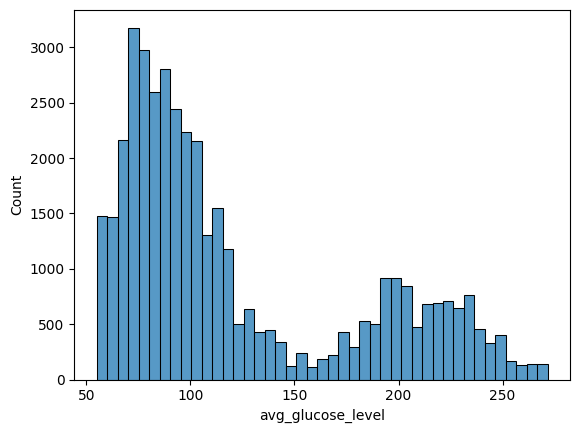

In [ ]:
#Phân bố người mắc bệnh theo lượng đường trong máu
sns.histplot(df['avg_glucose_level'])
plt.show()

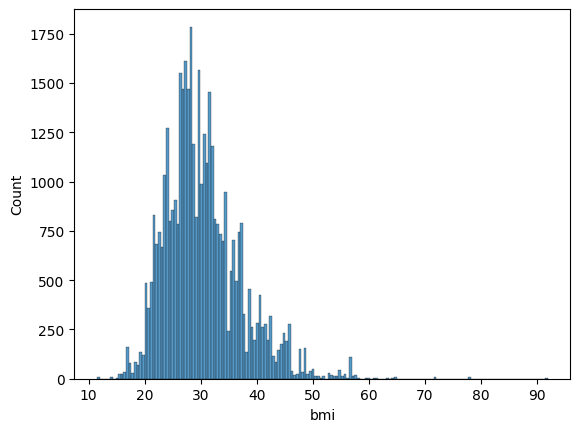

In [ ]:
#Phân bố người mắc bệnh theo chỉ số BMI
sns.histplot(df['bmi'])
plt.show()

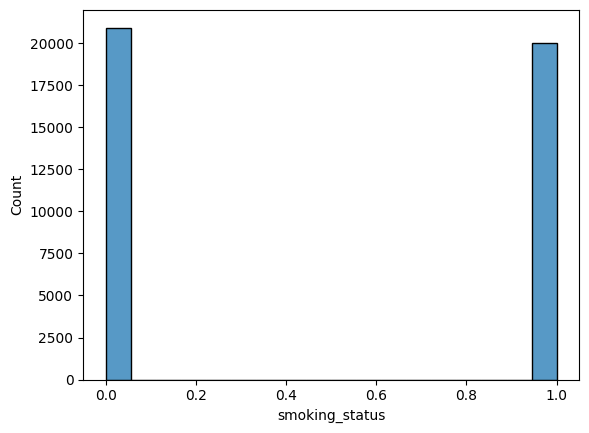

In [ ]:
#Phân bố người mắc bệnh theo tình trạng hút thuốc
sns.histplot(df['smoking_status'])
plt.show()

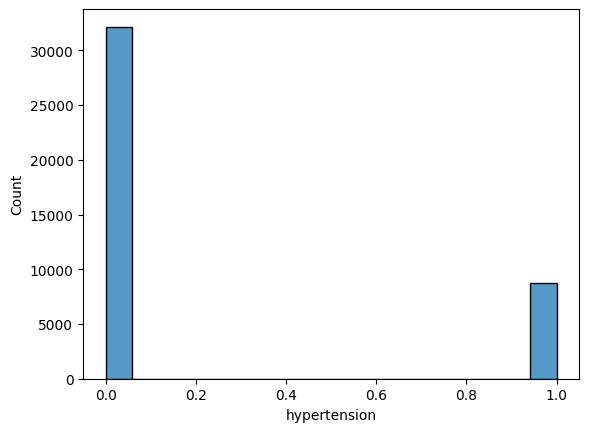

In [ ]:
#Phân bố người mắc bệnh theo bệnh lý tăng huyết áp
sns.histplot(df['hypertension'])
plt.show()

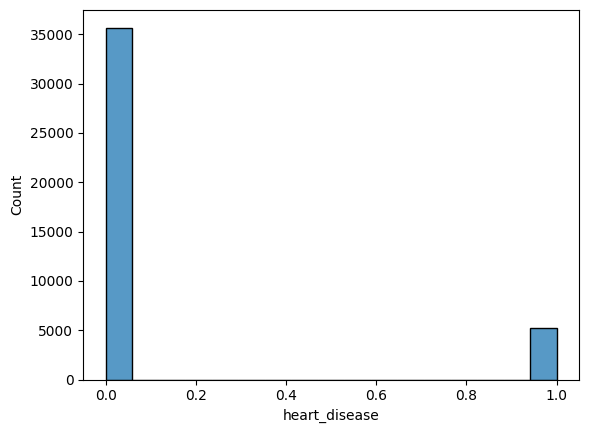

In [ ]:
#Phân bố người mắc bệnh theo bệnh lý về tim mạch
sns.histplot(df['heart_disease'])
plt.show()

##Tiền xử lý dữ liệu

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

In [ ]:
df["sex"] = lb_make.fit_transform(df["sex"])
df["age"] = lb_make.fit_transform(df["age"])
df["hypertension"] = lb_make.fit_transform(df["hypertension"])
df["heart_disease"] = lb_make.fit_transform(df["heart_disease"])
df["ever_married"] = lb_make.fit_transform(df["ever_married"])
df["work_type"] = lb_make.fit_transform(df["work_type"])
df["Residence_type"] = lb_make.fit_transform(df["Residence_type"])
df["avg_glucose_level"] = lb_make.fit_transform(df["avg_glucose_level"])
df["bmi"] = lb_make.fit_transform(df["bmi"])
df["smoking_status"] = lb_make.fit_transform(df["smoking_status"])
df["stroke"] = lb_make.fit_transform(df["stroke"])
df.head(10)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,70,0,1,1,4,1,2794,205,1,1
1,2,49,0,1,1,4,0,1836,164,0,1
2,0,68,0,0,1,4,1,2436,183,1,1
3,2,48,1,0,1,3,0,2444,79,0,1
4,2,92,0,0,1,4,1,2483,129,1,1
5,2,62,1,1,1,4,0,428,113,0,1
6,0,89,0,0,0,4,1,1444,67,0,1
7,0,24,1,0,1,4,0,851,136,0,1
8,2,38,0,1,1,2,0,2146,207,1,1
9,0,62,0,0,1,4,1,1807,112,1,1


<Axes: title={'center': 'Bảng hệ số tương quan giữa các thuộc tính'}>

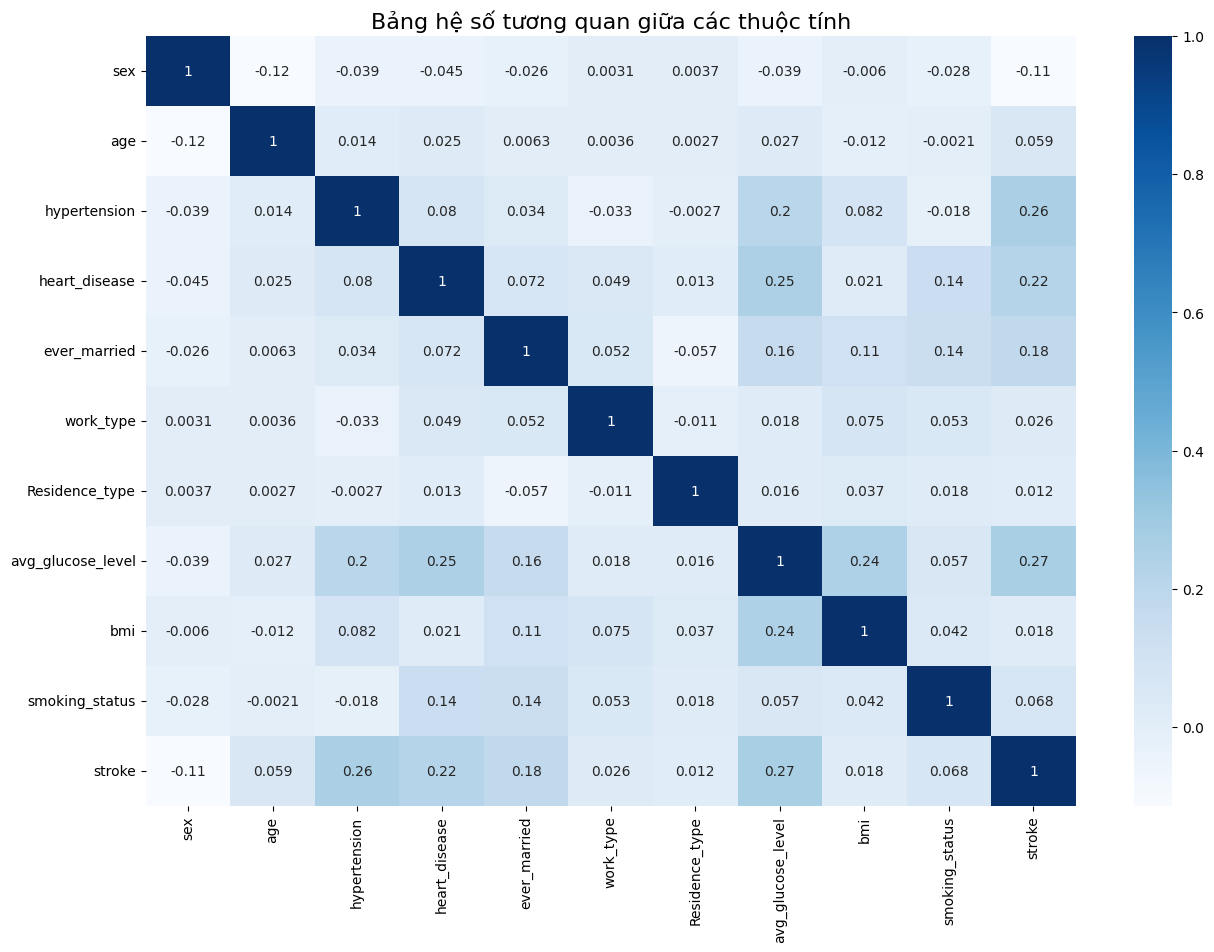

In [ ]:
#Trực quan hóa dữ liệu bằng bảng đồ nhiệt
corr = df.corr()
plt.figure(figsize = (15,10))
plt.title("Bảng hệ số tương quan giữa các thuộc tính", fontsize = 16)
sns.heatmap(corr, annot = True, cmap = "Blues")

In [ ]:
#Chuẩn hóa dữ liệu data về miền là 0 và 1 để giúp model traning nhanh hơn
#Đổi dữ liệu về miền từ 0 đến 1 cho các thuộc tính có giá trị lớn giúp xử lý chính xác hơn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scale_cols = ['age','avg_glucose_level','bmi']
df[scale_cols] = scaler.fit_transform(df[scale_cols])
df.head(10)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,0.636364,0,1,1,4,1,0.962784,0.555556,1,1
1,2,0.445455,0,1,1,4,0,0.632667,0.444444,0,1
2,0,0.618182,0,0,1,4,1,0.839421,0.495935,1,1
3,2,0.436364,1,0,1,3,0,0.842178,0.214092,0,1
4,2,0.836364,0,0,1,4,1,0.855617,0.349593,1,1
5,2,0.563636,1,1,1,4,0,0.147484,0.306233,0,1
6,0,0.809091,0,0,0,4,1,0.497588,0.181572,0,1
7,0,0.218182,1,0,1,4,0,0.293246,0.368564,0,1
8,2,0.345455,0,1,1,2,0,0.739490,0.560976,1,1
9,0,0.563636,0,0,1,4,1,0.622674,0.303523,1,1


##Xây dựng mô hình

In [ ]:
#Xây dựng bô dữ liệu kiểm thử
#Xác định các thuộc tính độc lập và thuộc tính phụ thuốc
features = ['sex',
           'age',
           'hypertension',
           'heart_disease',
           'ever_married',
           'work_type',
           'Residence_type',
           'avg_glucose_level',
           'bmi',
           'smoking_status']
target = ['stroke']
x = df[features]
y = df[target]
print(x)
print(y)

       sex       age  hypertension  heart_disease  ever_married  work_type  \
0        2  0.636364             0              1             1          4   
1        2  0.445455             0              1             1          4   
2        0  0.618182             0              0             1          4   
3        2  0.436364             1              0             1          3   
4        2  0.836364             0              0             1          4   
...    ...       ...           ...            ...           ...        ...   
40905    2  0.409091             0              0             0          4   
40906    0  0.545455             0              0             1          4   
40907    2  0.354545             0              0             1          2   
40908    2  0.445455             0              0             1          3   
40909    2  0.381818             0              0             0          4   

       Residence_type  avg_glucose_level       bmi  smoking_sta

##Xây dụng mô hình học

In [ ]:
#Chia bộ dữ liệu thành tập train và test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
#Chia features và labels
x = df.drop(['stroke'],axis = 1)
y = df['stroke']

##Decision Tree

In [ ]:
# Khởi tạo bộ phân loại Cây quyết định
# dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
# Huấn luyện mô hình trên tập huấn luyện
dt_classifier.fit(x_train, y_train)

# Dự đoán trên tập dữ liệu kiểm tra
y_pred = dt_classifier.predict(x_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.6747738939134685


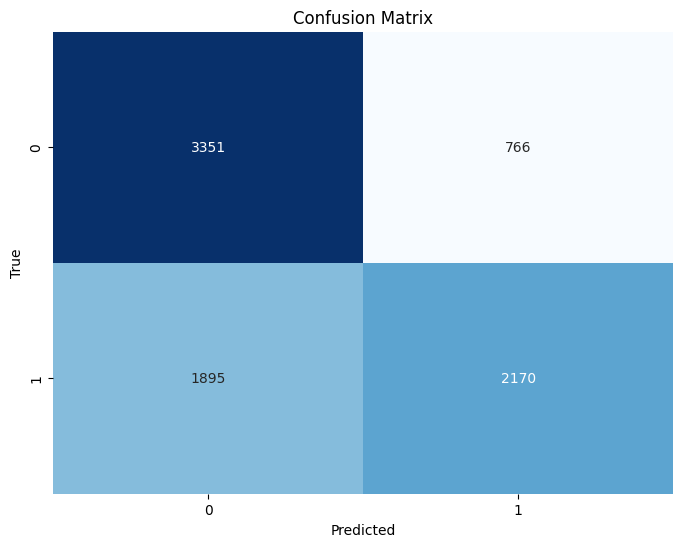

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

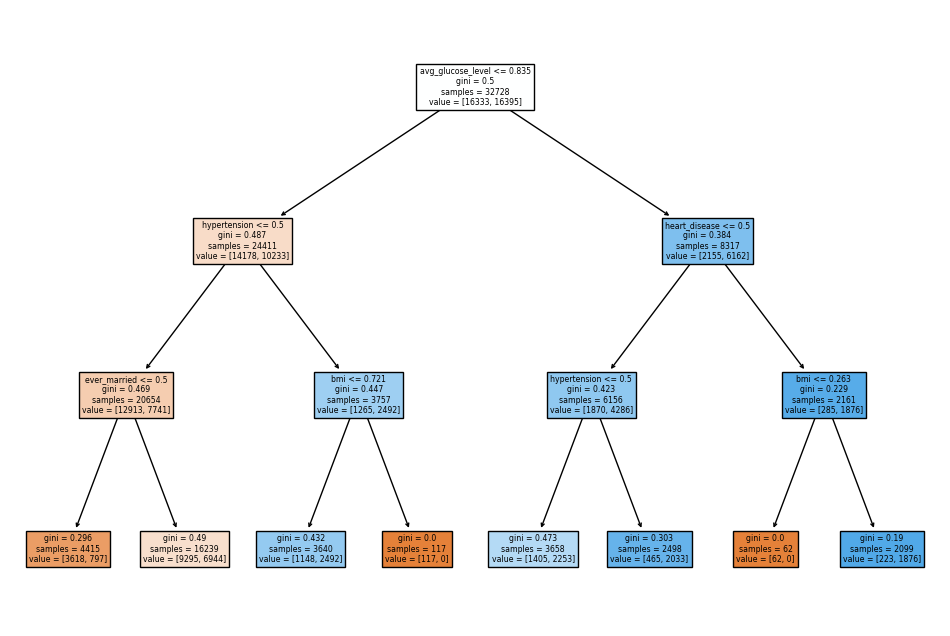

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=x.columns)
plt.show()

In [ ]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_values = range(3, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(x_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(x_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 3: Test Score = 0.6747738939134685
Max Depth = 4: Test Score = 0.7017844047910047
Max Depth = 5: Test Score = 0.7050843314593009
Max Depth = 6: Test Score = 0.7301393302371059
Max Depth = 7: Test Score = 0.7660718650696651
Max Depth = 8: Test Score = 0.7846492300171107
Max Depth = 9: Test Score = 0.8042043510144219
Max Depth = 10: Test Score = 0.840014666340748
Max Depth = 11: Test Score = 0.8535810315326327
Max Depth = 12: Test Score = 0.8969689562454167
Max Depth = 13: Test Score = 0.9127352725494989
Max Depth = 14: Test Score = 0.9307015399657785
Max Depth = 15: Test Score = 0.9513566365191884
Max Depth = 16: Test Score = 0.9575898313370814
Max Depth = 17: Test Score = 0.9739672451723295
Max Depth = 18: Test Score = 0.9775116108530921
Max Depth = 19: Test Score = 0.9832559276460523
Best Max Depth = 19: Best Test Score = 0.9832559276460523


In [ ]:
from sklearn.model_selection import cross_val_score
# Perform 10-fold cross-validation
scores = cross_val_score(clf, x, y, cv=10)
# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.98704473 0.989978   0.99046688 0.98631142 0.98362259 0.97848937
 0.98240039 0.98606698 0.98704473 0.98826693]
Mean CV Score: 0.9859692006844292


In [ ]:
from sklearn.tree import export_text
# Export the text representation of the decision tree
tree_rules = export_text(clf, feature_names=x.columns.tolist())
print(tree_rules)

|--- avg_glucose_level <= 0.84
|   |--- hypertension <= 0.50
|   |   |--- ever_married <= 0.50
|   |   |   |--- bmi <= 0.18
|   |   |   |   |--- class: 0
|   |   |   |--- bmi >  0.18
|   |   |   |   |--- bmi <= 0.19
|   |   |   |   |   |--- avg_glucose_level <= 0.50
|   |   |   |   |   |   |--- avg_glucose_level <= 0.36
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- avg_glucose_level >  0.36
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- avg_glucose_level >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  0.19
|   |   |   |   |   |--- work_type <= 3.50
|   |   |   |   |   |   |--- Residence_type <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Residence_type >  0.50
|   |   |   |   |   |   |   |--- avg_glucose_level <= 0.44
|   |   |   |   |   |   |   |   |--- work_type <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- work_type >  1.50
|   |   |

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
# Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the model
naive_bayes .fit(x_train, y_train)

# Make predictions
y_pred1 = naive_bayes.predict(x_test)

accuracy1 = accuracy_score(y_test, y_pred)
print(f"Naive Bayes: {accuracy1}")

Naive Bayes: 0.6747738939134685


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


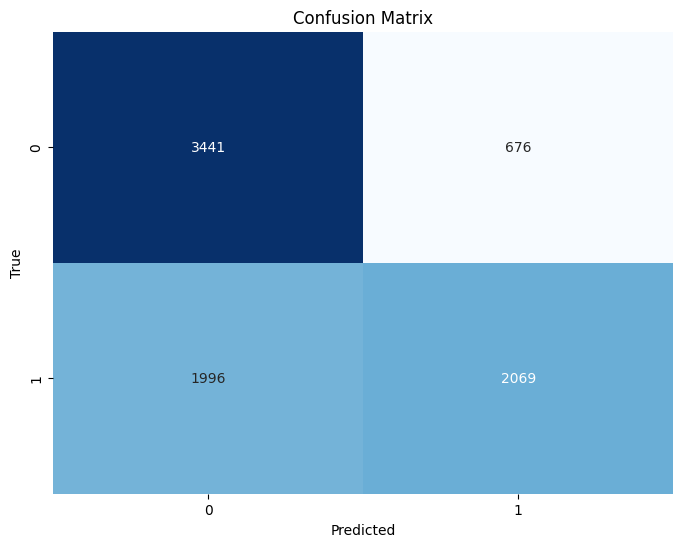

In [ ]:

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred1)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

##Chạy dự đoán

In [ ]:
new_data = pd.read_csv('/content/drive/MyDrive/Data/stroke_data_test.csv')

In [ ]:
new_data.head(20)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,63,0,1,1,4,1,228.69,36.6,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0
2,0.0,61,0,0,1,4,1,171.23,34.4,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0
4,1.0,85,0,0,1,4,1,186.21,29.0,1
5,1.0,55,1,1,1,4,0,70.09,27.4,0
6,0.0,82,0,0,0,4,1,94.39,22.8,0
7,0.0,17,1,0,1,4,0,80.43,29.7,0
8,1.0,31,0,1,1,2,0,120.46,36.8,1
9,0.0,55,0,0,1,4,1,104.51,27.3,1


In [ ]:
new_data = new_data.fillna(new_data.mean())
y_pred1 = naive_bayes.predict(new_data)
y_pred = dt_classifier.predict(new_data)

In [ ]:
print("Thuật toán Naive Bayes: ",y_pred1)
print("Thuật toán Decision Tree: ",y_pred)

Thuật toán Naive Bayes:  [1 1 1 ... 1 1 1]
Thuật toán Decision Tree:  [1 1 1 ... 1 1 1]
